#Importing necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from IPython.display import display
import seaborn as sns



#Loading our data and dropping Rows with Missing Values

In [ ]:
dataset = pd.read_csv('Auto.csv')
dataset = dataset.dropna()
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
print("Dataset Information")
display(dataset.info()) #to display basic information of the dataset

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


None

In [ ]:
print('Summary Statistics') #Display summary statistics
display(dataset.describe())

Summary Statistics


,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
print("First 5 rows of the dataset")
display(dataset.head())

First 5 rows of the dataset


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
ogLength=dataset.shape[0]

In [ ]:
#check for missing values in all columns
for column in dataset.columns:
  null_values=dataset[column].isnull()
  print(f"Number of null values in '{column}' column: {null_values.sum()}")

Number of null values in 'mpg' column: 0
Number of null values in 'cylinders' column: 0
Number of null values in 'displacement' column: 0
Number of null values in 'horsepower' column: 0
Number of null values in 'weight' column: 0
Number of null values in 'acceleration' column: 0
Number of null values in 'year' column: 0
Number of null values in 'origin' column: 0
Number of null values in 'name' column: 0


In [ ]:
dataset=dataset.dropna(axis=0)

In [ ]:
print(f"Number of rows dropped={ogLength-dataset.shape[0]}")

Number of rows dropped=0


In [ ]:
dataset['horsepower'] = dataset['horsepower'].replace({"?":dataset['horsepower'].mode()[0]})

In [ ]:
# print(df.iloc[336])
dataset['horsepower']=dataset['horsepower'].astype(int)

HeatMap of correlation

<ipython-input-24-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

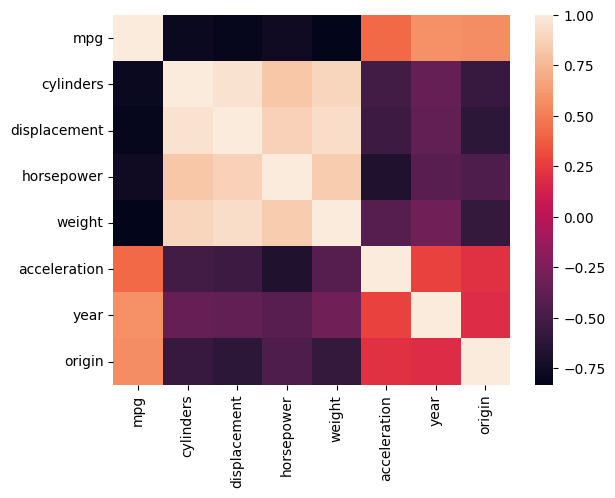

In [ ]:
sns.heatmap(dataset.corr())

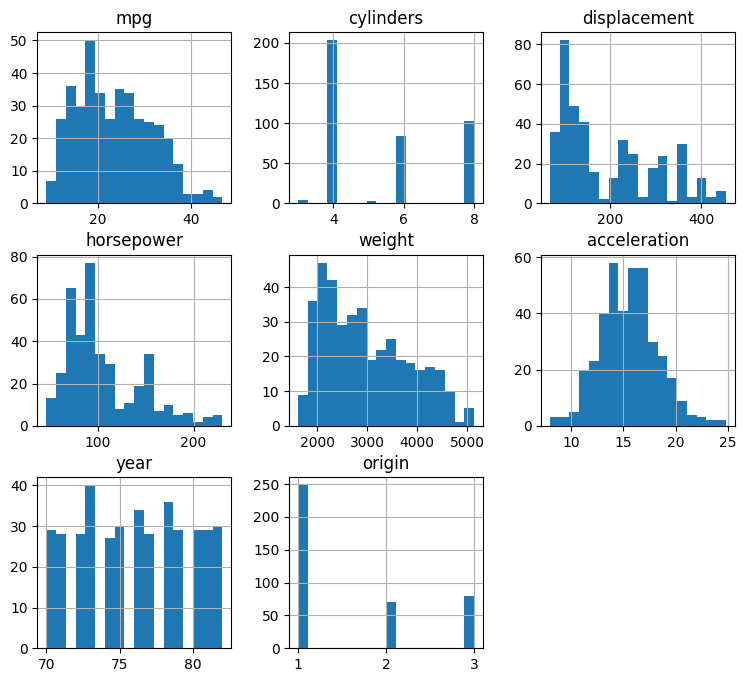

In [ ]:
dataset.hist(figsize=(9,8),bins=18)
plt.show()

#QDA

In [ ]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')
dataset['horsepower'].fillna(dataset['horsepower'].mean(), inplace=True)
dataset['horsepower'] = dataset['horsepower'].astype(int)


In [ ]:
dataset.isna().sum() #check columns for empty entries, 0 means no empty entry

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#Basic EDA

In [ ]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.463476,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.247424,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#Creating X and Y for training/testing

In [ ]:
X_Raw = dataset[['cylinders', 'displacement' , 'horsepower' , 'weight', 'acceleration', 'year' , 'origin']]
Y_Raw = dataset['mpg']
X_train, X_test, y_train, y_test = train_test_split(X_Raw, Y_Raw, test_size=0.3, random_state=10)

In [ ]:
print("X_train dimensions:", X_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_train dimensions:", y_train.shape)
print("y_test dimensions:", y_test.shape)

#verifying that train:test = 7:3


X_train dimensions: (277, 7)
X_test dimensions: (120, 7)
y_train dimensions: (277,)
y_test dimensions: (120,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#LASSO

In [ ]:
lasso = Lasso(alpha= 0.01)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)


In [ ]:
print("R-squared score on the test set: ", lasso.score(X_test_scaled, y_test))
print("R-squared score on the training set: ", lasso.score(X_train_scaled, y_train))

R-squared score on the test set:  0.8091253695935184
R-squared score on the training set:  0.8211100497227397


#RIDGE

In [ ]:
ridge = Ridge(alpha= 0.01)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

In [ ]:
print("R-squared score on the test set: ", ridge.score(X_test_scaled, y_test))
print("R-squared score on the training set: ", ridge.score(X_train_scaled, y_train))

R-squared score on the test set:  0.8081752803933737
R-squared score on the training set:  0.8212774448898663


# 10 fold Cross Validation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cross_val_scores(alphas, model_type, X_train, y_train):
    best_alpha_index = None
    best_r2_mean = float('-inf')

    mse_scores_mean = []
    mse_scores_std = []
    r2_scores_mean = []
    r2_scores_std = []

    for i, alpha in enumerate(alphas):
        if model_type == 'ridge':
            model_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
        elif model_type == 'lasso':
            modPart4el_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
        else:
            raise ValueError("Invalid model_type. Use 'ridge' or 'lasso'.")

        # Perform 10-fold cross-validation for Mean Squared Error (MSE)
        cv_scores_mse = cross_val_score(model_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
        cv_scores_mse_positive = -cv_scores_mse
        mse_scores_mean.append(np.mean(cv_scores_mse_positive))
        mse_scores_std.append(np.std(cv_scores_mse_positive))

        # Perform 10-fold cross-validation for R-squared
        cv_scores_r2 = cross_val_score(model_pipeline, X_train, y_train, cv=10, scoring='r2')
        r2_mean = np.mean(cv_scores_r2)
        r2_scores_mean.append(r2_mean)
        r2_scores_std.append(np.std(cv_scores_r2))

        if r2_mean > best_r2_mean:
            best_r2_mean = r2_mean
            best_alpha_index = i

     # Print MSE and R-squared values for each alpha
    print(f'{model_type.capitalize()} Scores:')
    for i, alpha in enumerate(alphas):
        print(f"Alpha: {alpha}")
        print("Cross-Validation Mean MSE:", mse_scores_mean[i])
        print("Cross-Validation Standard Deviation MSE:", mse_scores_std[i])
        print("Cross-Validation Mean R-squared:", r2_scores_mean[i])
        print("Cross-Validation Standard Deviation R-squared:", r2_scores_std[i])
        print()

    # Print results for the best alpha
    print(f'Best {model_type.capitalize()} Model (Alpha: {alphas[best_alpha_index]}):')
    print("Cross-Validation Mean MSE:", mse_scores_mean[best_alpha_index])
    print("Cross-Validation Standard Deviation MSE:", mse_scores_std[best_alpha_index])
    print("Cross-Validation Mean R-squared:", r2_scores_mean[best_alpha_index])
    print("Cross-Validation Standard Deviation R-squared:", r2_scores_std[best_alpha_index])
    sns.set(style="whitegrid")

    # Plotting MSE scores
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=alphas, y=mse_scores_mean, marker='o', label='MSE')
    for i, txt in enumerate(mse_scores_mean):
        plt.annotate(f'{txt:.4f}', (alphas[i], mse_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{model_type.capitalize()} Regression: Cross-Validation MSE at Different Alphas')
    plt.legend()
    plt.show()

    # Plotting R-squared scores
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=alphas, y=r2_scores_mean, marker='o', label='R-squared')
    for i, txt in enumerate(r2_scores_mean):
        plt.annotate(f'{txt:.5f}', (alphas[i], r2_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xscale('log')
    plt.xlabel('Alpha (Regularization Strength)')
    plt.ylabel('Mean R-squared')
    plt.title(f'{model_type.capitalize()} Regression: Cross-Validation R-squared at Different Alphas')
    plt.legend()
    plt.show()

alphas = [10.0, 1.0, 0.1, 0.001, 0.0001]


For LASSO

Lasso Scores:
Alpha: 10.0
Cross-Validation Mean MSE: 64.01192125621228
Cross-Validation Standard Deviation MSE: 17.227951363490785
Cross-Validation Mean R-squared: -0.026513938925329005
Cross-Validation Standard Deviation R-squared: 0.018814186152720933

Alpha: 1.0
Cross-Validation Mean MSE: 13.964266135046335
Cross-Validation Standard Deviation MSE: 6.292799157514894
Cross-Validation Mean R-squared: 0.779687689699242
Cross-Validation Standard Deviation R-squared: 0.0633569948108386

Alpha: 0.1
Cross-Validation Mean MSE: 12.199698042345268
Cross-Validation Standard Deviation MSE: 4.719354518529793
Cross-Validation Mean R-squared: 0.8021555976266029
Cross-Validation Standard Deviation R-squared: 0.05500871327301872

Alpha: 0.001
Cross-Validation Mean MSE: 12.340430806693728
Cross-Validation Standard Deviation MSE: 4.625192444674414
Cross-Validation Mean R-squared: 0.8003596542408541
Cross-Validation Standard Deviation R-squared: 0.05215855912409628

Alpha: 0.0001
Cross-Validation Mean M

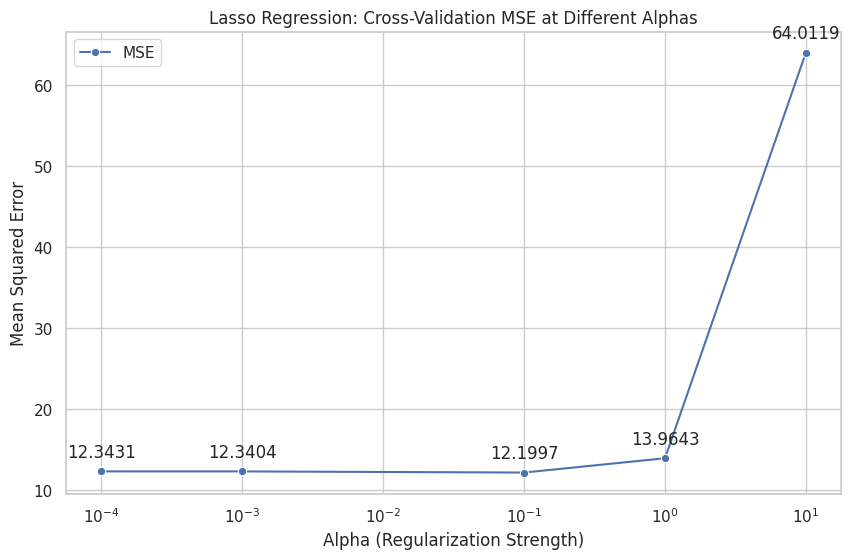

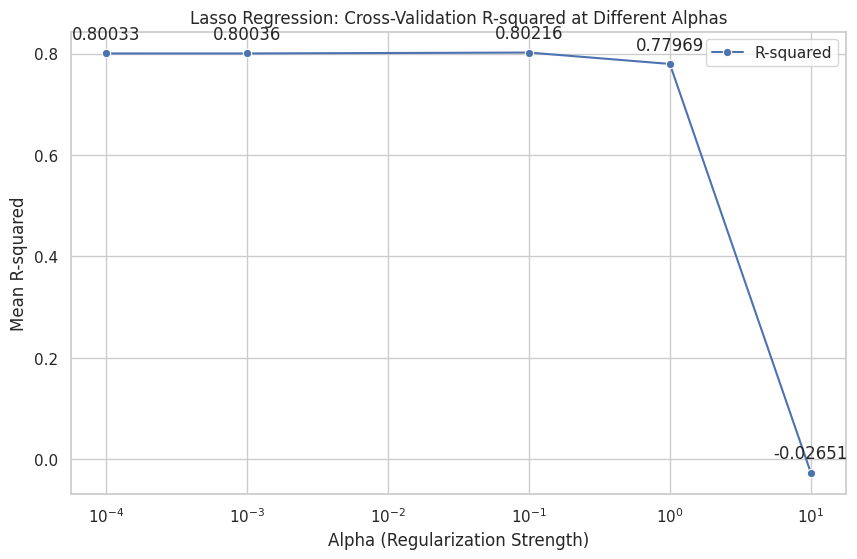

In [ ]:
plot_cross_val_scores(alphas, 'lasso', X_train, y_train)


For RIDGE


Ridge Scores:
Alpha: 10.0
Cross-Validation Mean MSE: 12.432728359887118
Cross-Validation Standard Deviation MSE: 4.973727712167472
Cross-Validation Mean R-squared: 0.799175798061329
Cross-Validation Standard Deviation R-squared: 0.055431352536598706

Alpha: 1.0
Cross-Validation Mean MSE: 12.292651369888095
Cross-Validation Standard Deviation MSE: 4.678134225813879
Cross-Validation Mean R-squared: 0.8011189633026976
Cross-Validation Standard Deviation R-squared: 0.05302946496213454

Alpha: 0.1
Cross-Validation Mean MSE: 12.33636630755731
Cross-Validation Standard Deviation MSE: 4.627706785030233
Cross-Validation Mean R-squared: 0.8004357145904131
Cross-Validation Standard Deviation R-squared: 0.05217666074864494

Alpha: 0.001
Cross-Validation Mean MSE: 12.343291589716191
Cross-Validation Standard Deviation MSE: 4.621927660359299
Cross-Validation Mean R-squared: 0.8003286454375835
Cross-Validation Standard Deviation R-squared: 0.052067338410900665

Alpha: 0.0001
Cross-Validation Mean MSE

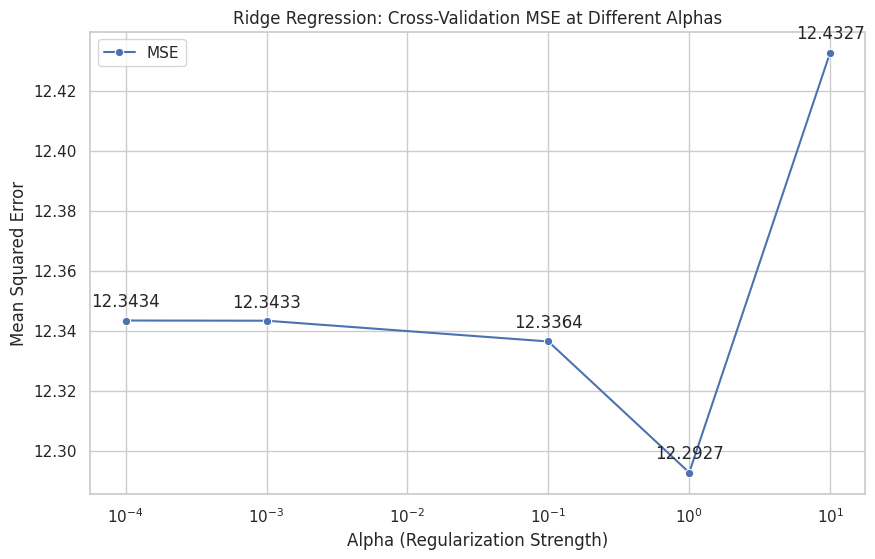

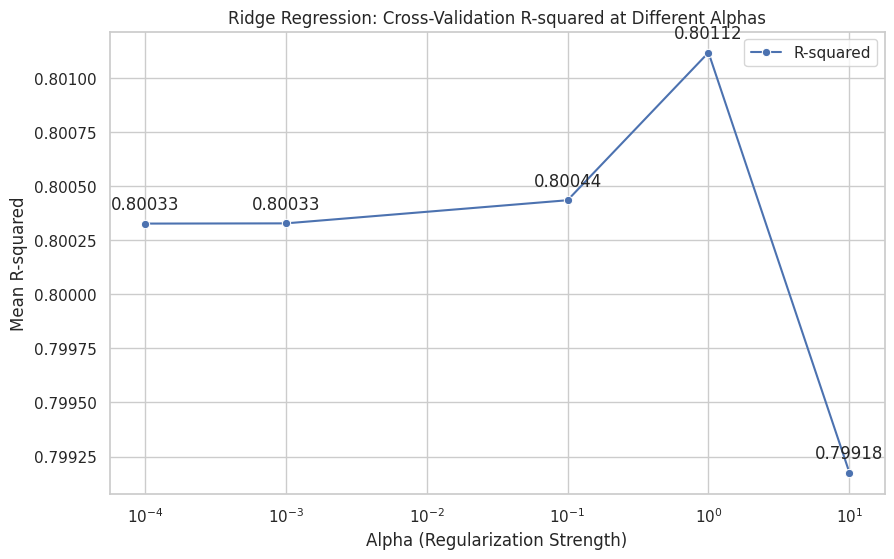

In [ ]:
plot_cross_val_scores(alphas, 'ridge', X_train, y_train)